In [ ]:
import sys # for automation and parallelisation
manual, scenario = (True, 'base') if 'ipykernel' in sys.argv[0] else (False, sys.argv[1])
if manual:
    %matplotlib inline

In [1]:
import pandas as pd
import numpy as np

# Preparation of validation data
This notebook prepares input data from the dataset "[Mobilität in Deutschland 2017](http://www.mobilitaet-in-deutschland.de/) B2" (MiD2017) for model validation. The German Federal Ministry of Transport and Digital Infrastructure is copyright holder of this dataset and does not allow its publication. However, aggregate shares are already published on [Mobilität in Tabellen](https://mobilitaet-in-tabellen.dlr.de/mit/) and will be reproduced here.

In [2]:
input_path = '../input/transport_demand/'

In [3]:
trips = pd.read_csv(input_path + 'calibration_inter-cellular_trips_MiD2017.csv')
print(trips.shape)

(96028, 25)


In [4]:
trips = trips.groupby(['mode_model','purpose_model']).size().unstack('purpose_model').replace({np.nan: 0})

In C:\Users\marlin.arnz\AppData\Local\Continuum\miniconda3\envs\quetzal\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\marlin.arnz\AppData\Local\Continuum\miniconda3\envs\quetzal\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\marlin.arnz\AppData\Local\Continuum\miniconda3\envs\quetzal\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\marlin.arnz\AppData\Local\Continuum\miniconda3\envs\quetzal\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none func

array([<AxesSubplot:ylabel='1'>, <AxesSubplot:ylabel='2'>,
       <AxesSubplot:ylabel='3'>, <AxesSubplot:ylabel='4'>,
       <AxesSubplot:ylabel='6'>], dtype=object)

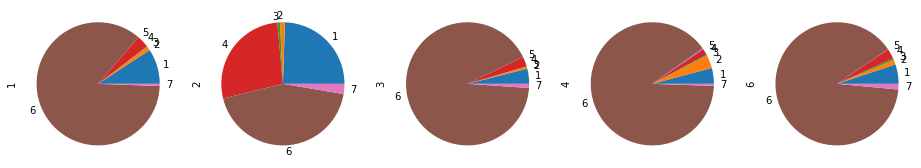

In [5]:
if manual: trips.plot.pie(subplots=True, figsize=(16,4), legend=None)

<AxesSubplot:ylabel='None'>

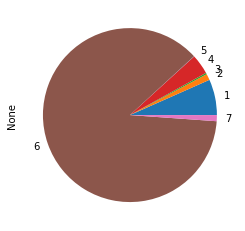

In [6]:
if manual: trips.T.sum().plot.pie()

In [7]:
trips.to_csv('../input_static/mid2017_validation_normalised.csv')